In [1]:
%%time
from scipy.io import arff
import pandas as pd
import numpy as np


data1 = pd.DataFrame(arff.loadarff('C:/Users/bodie/Documents/1year.arff')[0])
data2 = pd.DataFrame(arff.loadarff('C:/Users/bodie/Documents/2year.arff')[0])
data3 = pd.DataFrame(arff.loadarff('C:/Users/bodie/Documents/3year.arff')[0])
data4 = pd.DataFrame(arff.loadarff('C:/Users/bodie/Documents/4year.arff')[0])
data5 = pd.DataFrame(arff.loadarff('C:/Users/bodie/Documents/5year.arff')[0])

df = pd.concat([data1, data2, data3, data4, data5])

df.columns =['net profit / total assets','total liabilities / total assets','working capital / total assets','current assets / short-term liabilities','[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365','retained earnings / total assets','EBIT / total assets','book value of equity / total liabilities','sales / total assets','equity / total assets','(gross profit + extraordinary items + financial expenses) / total assets','gross profit / short-term liabilities','(gross profit + depreciation) / sales','(gross profit + interest) / total assets','(total liabilities * 365) / (gross profit + depreciation)','(gross profit + depreciation) / total liabilities','total assets / total liabilities','gross profit / total assets','gross profit / sales','(inventory * 365) / sales','sales (n) / sales (n-1)','profit on operating activities / total assets','net profit / sales','gross profit (in 3 years) / total assets','(equity - share capital) / total assets','(net profit + depreciation) / total liabilities','profit on operating activities / financial expenses','working capital / fixed assets','logarithm of total assets','(total liabilities - cash) / sales','(gross profit + interest) / sales','(current liabilities * 365) / cost of products sold','operating expenses / short-term liabilities','operating expenses / total liabilities','profit on sales / total assets','total sales / total assets','(current assets - inventories) / long-term liabilities','constant capital / total assets','profit on sales / sales','(current assets - inventory - receivables) / short-term liabilities','total liabilities / ((profit on operating activities + depreciation) * (12/365))','profit on operating activities / sales','rotation receivables + inventory turnover in days','(receivables * 365) / sales','net profit / inventory','(current assets - inventory) / short-term liabilities','(inventory * 365) / cost of products sold','EBITDA (profit on operating activities - depreciation) / total assets','EBITDA (profit on operating activities - depreciation) / sales','current assets / total liabilities','short-term liabilities / total assets','(short-term liabilities * 365) / cost of products sold)','equity / fixed assets','constant capital / fixed assets','working capital','(sales - cost of products sold) / sales','(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)','total costs /total sales','long-term liabilities / equity','sales / inventory','sales / receivables','(short-term liabilities *365) / sales','sales / short-term liabilities','sales / fixed assets','Class',
]

#Recode the classes
df['Class'] = df['Class'].replace([b'1'],1)
df['Class'] = df['Class'].replace([b'0'],0)
df.head()


Wall time: 3.27 s


,net profit / total assets,total liabilities / total assets,working capital / total assets,current assets / short-term liabilities,[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365,retained earnings / total assets,EBIT / total assets,book value of equity / total liabilities,sales / total assets,equity / total assets,...,(sales - cost of products sold) / sales,(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation),total costs /total sales,long-term liabilities / equity,sales / inventory,sales / receivables,(short-term liabilities *365) / sales,sales / short-term liabilities,sales / fixed assets,Class
0,0.200550,0.37951,0.39641,2.0472,32.3510,0.38825,0.249760,1.33050,1.1389,0.50494,...,0.121960,0.39718,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.4277,0
1,0.209120,0.49988,0.47225,1.9447,14.7860,0.00000,0.258340,0.99601,1.6996,0.49788,...,0.121300,0.42002,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.9870,0
2,0.248660,0.69592,0.26713,1.5548,-1.1523,0.00000,0.309060,0.43695,1.3090,0.30408,...,0.241140,0.81774,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.2078,0
3,0.081483,0.30734,0.45879,2.4928,51.9520,0.14988,0.092704,1.86610,1.0571,0.57353,...,0.054015,0.14207,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.5497,0
4,0.187320,0.61323,0.22960,1.4063,-7.3128,0.18732,0.187320,0.63070,1.1559,0.38677,...,0.134850,0.48431,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.8980,0


## Sum up missing values

In [2]:
pd.options.display.max_rows = 999

df.isnull().sum().sort_values(ascending=False)

(current assets - inventories) / long-term liabilities                                                                 18984
sales (n) / sales (n-1)                                                                                                 5854
profit on operating activities / financial expenses                                                                     2764
sales / inventory                                                                                                       2152
net profit / inventory                                                                                                  2147
gross profit (in 3 years) / total assets                                                                                 922
working capital / fixed assets                                                                                           812
sales / fixed assets                                                                                                     812


#  Equations for solving for missing values


In [59]:
%%time
##Fill is missing values sales/invetory by taking inverse of invetory * 365  / sales then times 365.
#df['sales / inventory'] = df.apply(
    #lambda row: np.power(row['(inventory * 365) / sales'],-1)*365 if np.isnan(row['sales / inventory']) else row['sales / inventory'],
    #axis=1
#)

###fill in missing values for net profit / invetories

#df['net profit / inventory'] = df.apply(lambda row: row['sales / inventory']*row['net profit / sales'] if np.isnan(row['net profit / inventory']) else row['net profit / inventory'],axis=1
                                       #)
    
#df['(current assets - inventories) / long-term liabilities']= df.apply(lambda row: pow(row['long-term liabilities / equity']*row['equity / total assets']* pow(row['short-term liabilities / total assets'],-1)*row['(current assets - inventory) / short-term liabilities'],-1) if np.isnan(row['(current assets - inventories) / long-term liabilities']) else row['(current assets - inventories) / long-term liabilities'],axis=1)
                                       

C:\Users\bodie\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
C:\Users\bodie\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


Wall time: 1.15 s


Although, these equations are accurate in solving for respective ratios, the dataset contains Zeros for some columns. In my opinion, these additional zeros are missing values. so when you try to divide by zero, you get error message above. For example, a company can't have a value of 0 for net profit / inventory unless its a tech company.


## Create Arrays

In [2]:
%%time
if 'Class' in df:
    y = df['Class'].values
    del df['Class']
    X = df.values

Wall time: 0 ns


In [3]:
X

array([[ 2.0055e-01,  3.7951e-01,  3.9641e-01, ...,  8.2658e+01,
         4.4158e+00,  7.4277e+00],
       [ 2.0912e-01,  4.9988e-01,  4.7225e-01, ...,  1.0735e+02,
         3.4000e+00,  6.0987e+01],
       [ 2.4866e-01,  6.9592e-01,  2.6713e-01, ...,  1.3427e+02,
         2.7185e+00,  5.2078e+00],
       ...,
       [-1.7905e-01,  1.2553e+00, -2.7599e-01, ...,  2.0787e+02,
         1.7559e+00,  9.9527e+00],
       [-1.0886e-01,  7.4394e-01,  1.5449e-02, ...,  8.3122e+01,
         4.3911e+00,  9.5575e-01],
       [-1.0537e-01,  5.3629e-01, -4.5578e-02, ...,  1.3685e+02,
         2.6672e+00,  2.7927e+00]])

## Create CV object

In [3]:
%%time
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold

import random
#Setting Seed
#will use this in CV portion
random.seed(10)
seed = random.randint(1,500)
print("seed is:",seed)


#Creating the  CV
num_cv_iterations = 10
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         random_state = seed,
                         test_size  = 0.2)



print(cv_object)


seed is: 293
ShuffleSplit(n_splits=10, random_state=293, test_size=0.2, train_size=None)
Wall time: 696 ms


## XGBOOST feature importance

Acc score is 0.9776523441999769
----------------
Precision score is 0.9142857142857143
----------------
Recall score is 0.6009389671361502
----------------


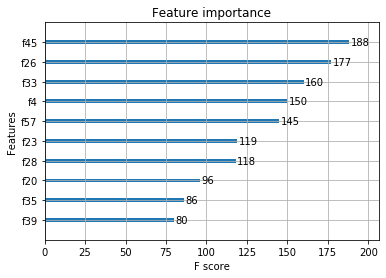

Wall time: 15.2 s


In [27]:
%%time
from xgboost import XGBClassifier
from sklearn import metrics as mt
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from xgboost import plot_importance


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)


model = XGBClassifier(use_label_encoder =False,eval_metric='mlogloss')
model.fit(X_train,y_train)

predictions = model.predict(X_test)

print("Acc score is",mt.accuracy_score(y_test,predictions))
print("----------------")
print("Precision score is",mt.precision_score(y_test,predictions))
print("----------------")
print("Recall score is",mt.recall_score(y_test,predictions))
print("----------------")



plot_importance(model,max_num_features=10)
pyplot.show()

Important features are f45,f26,f57,f4,f33,f20,f28,f54,f39 which translates to the following columns/features
    * 'net profit / inventory' 
    *'(net profit + depreciation) / total liabilities'
    *'(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation)'
    *'current assets / short-term liabilities'
    *'operating expenses / short-term liabilities'
    *'(inventory * 365) / sales'
    *'net profit / sales'
    *'working capital / fixed assets'
    *'constant capital / fixed assets'
    *'profit on sales / sales'




## XGBOOST

In [6]:
%%time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from xgboost import XGBClassifier
from sklearn import metrics as mt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer



imp = KNNImputer(n_neighbors=3)


#imp =  KNNImputer(n_neighbors=3, weights="uniform")

##Model
clf = XGBClassifier(use_label_encoder =False,eval_metric='mlogloss',base_score=.95)


                            
pipeline_object = Pipeline([('missing', imp),  
                             ('model',clf)]) 
 
                            
                            
Iteration = []
Accuracy = []
Precision = []
Recall = []

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    pipeline_object.fit(X[train_indices],y[train_indices])  
    y_hat = pipeline_object.predict(X[test_indices]) 
    
    
    
    Iteration.append(iter_num)
    Accuracy.append(mt.accuracy_score(y[test_indices],y_hat))
    Precision.append(mt.precision_score(y[test_indices],y_hat))
    Recall.append(mt.recall_score(y[test_indices],y_hat))
    
XGB_results = pd.DataFrame({'Iteration':Iteration,'Accuracy': Accuracy,'Precision':Precision,
                                'Recall':Recall},columns = ['Iteration','Accuracy','Precision','Recall'])


XGB_results


Wall time: 13min 50s


,Iteration,Accuracy,Precision,Recall
0,0,0.964405,0.803922,0.378753
1,1,0.962677,0.832461,0.352550
2,2,0.968782,0.859459,0.393564
3,3,0.968552,0.877934,0.430876
4,4,0.967285,0.793651,0.379747
5,5,0.966939,0.866667,0.372315
6,6,0.966479,0.850000,0.366906
7,7,0.964866,0.849711,0.345070
8,8,0.970050,0.862069,0.429975
9,9,0.965787,0.827957,0.367542


# Tuning XGBOOST

In [11]:
%%time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

clf = XGBClassifier(use_label_encoder =False,eval_metric='mlogloss')

parameters = {
    'max_depth': [5,8,10],
    'n_estimators': [10,20,25],
   'learning_rate': [0.1, 0.01, 0.05]
}

grid = GridSearchCV(clf,param_grid=parameters,cv=10,scoring='recall',refit=True,verbose=True,
                   n_jobs=10)


pipeline_object = Pipeline([('missing', imp),  
                             ('gridsearch',grid)]) 
 

pipeline_object.fit(X_train,y_train)

print(grid.best_estimator_)
print("------------------------------------------------------------------------")
cv_results = pd.DataFrame(grid.cv_results_)
print(cv_results.iloc[grid.best_index_])
print("------------------------------------------------------------------------")
print(grid.best_params_)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


KeyboardInterrupt: 

# Tuned XGBOOST

In [40]:
%%time
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from xgboost import XGBClassifier
from sklearn import metrics as mt
from sklearn.pipeline import Pipeline

##Model
clf = XGBClassifier(use_label_encoder =False,eval_metric='mlogloss',learning_rate= 0.1,max_depth= 10, n_estimators=25,
                   base_score=0.9)



Iteration = []
Accuracy = []
Precision = []
Recall = []

for iter_num, (train_indices, test_indices) in enumerate(cv_object.split(X,y)):
    clf.fit(X[train_indices],y[train_indices])  
    y_hat = clf.predict(X[test_indices]) 
    
    
    
    Iteration.append(iter_num)
    Accuracy.append(mt.accuracy_score(y[test_indices],y_hat))
    Precision.append(mt.precision_score(y[test_indices],y_hat))
    Recall.append(mt.recall_score(y[test_indices],y_hat))
    
Tuned_XGB_results = pd.DataFrame({'Iteration':Iteration,'Accuracy': Accuracy,'Precision':Precision,
                                'Recall':Recall},columns = ['Iteration','Accuracy','Precision','Recall'])


Tuned_XGB_results

Wall time: 1min 11s


,Iteration,Accuracy,Precision,Recall
0,0,0.971547,0.947115,0.454965
1,1,0.971777,0.959821,0.476718
2,2,0.973505,0.939394,0.460396
3,3,0.973390,0.931915,0.504608
4,4,0.976616,0.961538,0.506329
5,5,0.971893,0.922705,0.455847
6,6,0.971893,0.921951,0.453237
7,7,0.970050,0.923469,0.424883
8,8,0.973390,0.915094,0.476658
9,9,0.973390,0.935185,0.482100
